
# 🌼 기계학습 및 데이터 전처리 - 2차시(24.11.01)

---


## 1. 이상치 처리
### 1-1. 이상치를 포함한 데이터프레임

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [11]:
data = {
    '고객ID' : [101,102,103,104,105,106],
    '이름' : ['유진', '가을', '레이', '원영', '리즈', '이서'],
    '구매금액' : [25000, 30000, 15000, 50000, 10000, 500000]
}
df_outliers = pd.DataFrame(data)
df_outliers.head(3)

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000


In [12]:
df_outliers

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000
5,106,이서,500000


### 2-2. 이상치 탐색
- 박스플롯 찍어보기
- 시각적으로 이상치 탐색
- 박스플롯상에서 점으로 나타나는 값이 이상치일 가능성 多

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

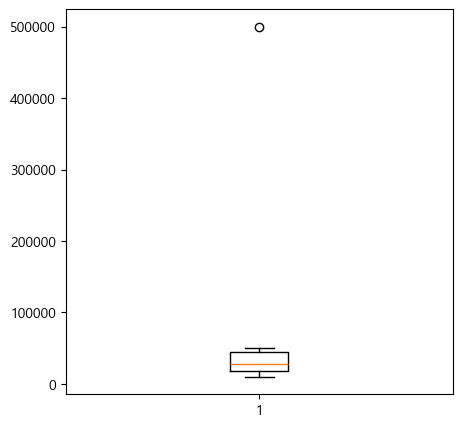

In [13]:
plt.figure(figsize=(5,5))
plt.boxplot(df_outliers['구매금액'])
plt.show()

### 2-3. 이상치 처리
- 특정 조건에 따라 이상치 제거

In [135]:
df_outliers

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000
5,106,이서,500000


In [134]:
# 데이터 신뢰성을 위해 이상치 자체가 오류이면 제거
# (단,이상치가 중요한 정보를 포함할 가능성이 있기 때문에 그럴경우도 생각해야 함)
df_outliers[df_outliers['구매금액'] < 100000] 

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000


In [136]:
df_no_outliers = df_outliers[df_outliers['구매금액'] < 100000]
df_no_outliers

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000


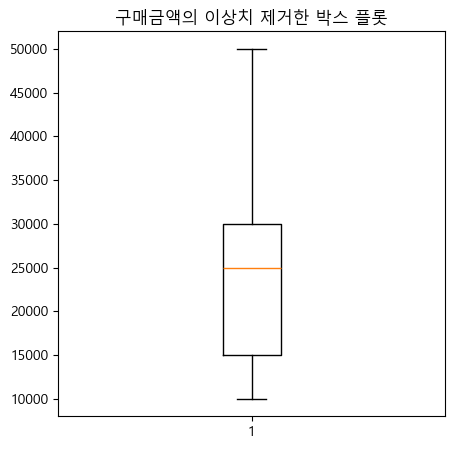

In [137]:
plt.figure(figsize=(5, 5))
plt.boxplot(df_no_outliers['구매금액'])
plt.title('구매금액의 이상치 제거한 박스 플롯')
plt.show()

### boxplot
- 박스플롯은 데이터의 분포와 이상치를 시각적으로 보여주는 그래프
### 구성 요소 : 
 1. `박스(Box)`:  
 데이터의 1사분위수(Q1)와 3사분위수(Q3) 사이의 범위  
 박스의 상단은 Q3, 하단은 Q1을 나타내며, 이 범위는 데이터의 중간 50%를 포함

 2. `중앙선(Median Line)`:  
 박스 안의 굵은 선은 중앙값(Median).  
 -> 데이터의 중간에 해당하는 값  

 3. `수염(Whiskers)`:  
 박스 상단과 하단에서 각각 최솟값과 최댓값을 나타냄
 하지만, 수염은 극단적인 값(이상치)을 제외한 값들로 제한됨

 4. `이상치(Outliers)`:  
 수염 밖에 있는 점으로 표시된 값들
 이 값들은 일반적인 데이터 범위를 벗어난 값들로, 이상치라고 함

In [14]:
Q1 = df_outliers['구매금액'].quantile(0.25)
Q3 = df_outliers['구매금액'].quantile(0.75)
median = df_outliers['구매금액'].median()
IQR = Q3 - Q1

In [15]:
print(f'1사분위수 (Q1) : {Q1}')
print(f'3사분위수 (Q3) : {Q3}')
print(f'중앙값 : {median}')
print(f'사분위 범위(IQR) : {IQR}')

1사분위수 (Q1) : 17500.0
3사분위수 (Q3) : 45000.0
중앙값 : 27500.0
사분위 범위(IQR) : 27500.0


In [ ]:
lower_bound = Q1 - (1.5 * IQR)
# IQR 방법 : 이상치 범위를 계산하는 공식
# (1.5 * IQR) 밖의 값은 이상치로 간주
upper_bound = Q3 + (1.5 * IQR)

In [17]:
print(f'이상치 탐색 범위 {lower_bound} ~ {upper_bound}')

이상치 탐색 범위 -23750.0 ~ 58750.0


In [21]:
outliers = df_outliers[(df_outliers['구매금액'] < lower_bound) | (df_outliers['구매금액'] > upper_bound)]
outliers


,고객ID,이름,구매금액
5,106,이서,500000


In [145]:
df_outliers

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000
5,106,이서,500000


In [23]:
normal_data = df_outliers.iloc[:-1, :]
normal_data

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000


In [24]:
df_outliers.iloc[5]

고객ID       106
이름          이서
구매금액    500000
Name: 5, dtype: object

In [ ]:
# 이상치였던 이서 데이터만 따로 한 줄 저장
outliers_data = df_outliers.iloc[5]

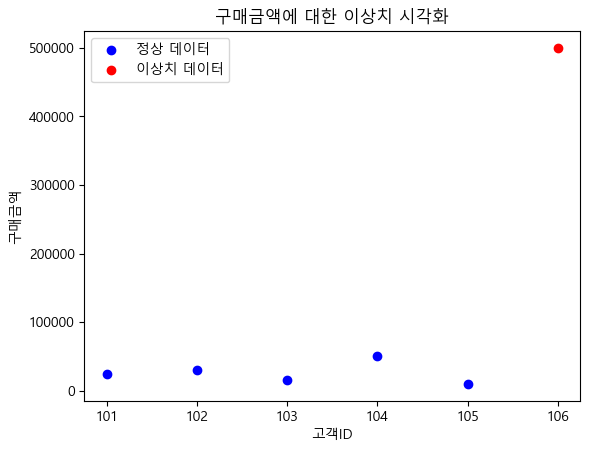

In [147]:
plt.scatter(normal_data['고객ID'], normal_data['구매금액'], color='blue', label='정상 데이터')
plt.scatter(outliers_data['고객ID'], outliers_data['구매금액'], color='red', label='이상치 데이터')

plt.title('구매금액에 대한 이상치 시각화')
plt.xlabel('고객ID')
plt.ylabel('구매금액')
plt.legend()
plt.show()

## 3. 정규화 (Normalization)
### 3-1. Min-Max Scaling
- 데이터를 0과 1사이의 값으로 정규화하여 특정 값의 크기를 조정하는 방법
- 연속형 변수에 사용할 수 있음
- MinMaxScaler는 모든 값을 최대값을 1, 최솟값을 0으로 변환
- 데이터의 범위를 좁혀서 머신러닝 모델이 데이터를 학습하기 쉽게 만듦

In [30]:
# pip install pydataset

     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     --------------------------------------- 15.9/15.9 MB 99.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939424 sha256=d109cc4ab1c0ba312a30a1228e45f4b472c784086e87e12d2004ad734847ba23
  Stored in directory: c:\users\rmarket\appdata\local\pip\cache\wheels\6b\86\a7\f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset
Note: you may need to restart the kernel to use updated packages.


In [31]:
from pydataset import data # 파이썬에서 제공하는 기본 데이터 셋
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001



|열 이름|설명|
|---|---|
|Ozone	|오존 수준 (ppb 단위, 결측치 존재)|
|Solar.R|	태양 복사량 (lang 단위)|
|Wind|	바람의 속도 (mph 단위)|
|Temp|	온도 (화씨)|
|Month	|측정 월 (5 = 5월, 6 = 6월, ...)|
|Day|	측정 일 (1~31일)|

In [33]:
df = data('airquality')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [70]:
df = df.rename(columns={
    'Ozone' : '오존농도',
    'Solar.R': '태양복사량',
    'Wind' : '풍속',
    'Temp' : '온도',
    'Month' : '월',
    'Day' : '일'
})
df.head()

,오존농도,태양복사량,풍속,온도,월,일
1,41.00000,190.000000,7.4,67,5,1
2,36.00000,118.000000,8.0,72,5,2
3,12.00000,149.000000,12.6,74,5,3
4,18.00000,313.000000,11.5,62,5,4
5,42.12931,185.931507,14.3,56,5,5


In [62]:
# 첫번째 할일 : 결측치 확인하기
df.isnull().sum()

오존농도      0
태양 복사량    0
풍속        0
온도        0
월         0
일         0
dtype: int64

In [46]:
df.mean()

오존농도       42.129310
태양 복사량    185.931507
풍속          9.957516
온도         77.882353
월           6.993464
일          15.803922
dtype: float64

In [39]:
df.fillna(df.mean(), inplace=True)

In [42]:
df.head()

,오존농도,태양 복사량,풍속,온도,월,일
1,41.00000,190.000000,7.4,67,5,1
2,36.00000,118.000000,8.0,72,5,2
3,12.00000,149.000000,12.6,74,5,3
4,18.00000,313.000000,11.5,62,5,4
5,42.12931,185.931507,14.3,56,5,5


In [ ]:
# 연속형 변수 : 숫자로 표현할 수 있고, 소수점으로 표현할 수 있는 변수
# 예 : 키, 몸무게, 온도
# 범주형 변수 : 서로 구분은 되는 범주, 그룹 (수치적인 의미가 없는 변수)
# 예 : 성별, 척도(매우좋음, 좋음, 보통)

In [52]:
features = ['오존농도', '태양복사량','풍속','온도']

for i, feature in enumerate(features):
    print(i, feature, sep='/')

0/오존농도
1/태양복사량
2/풍속
3/온도


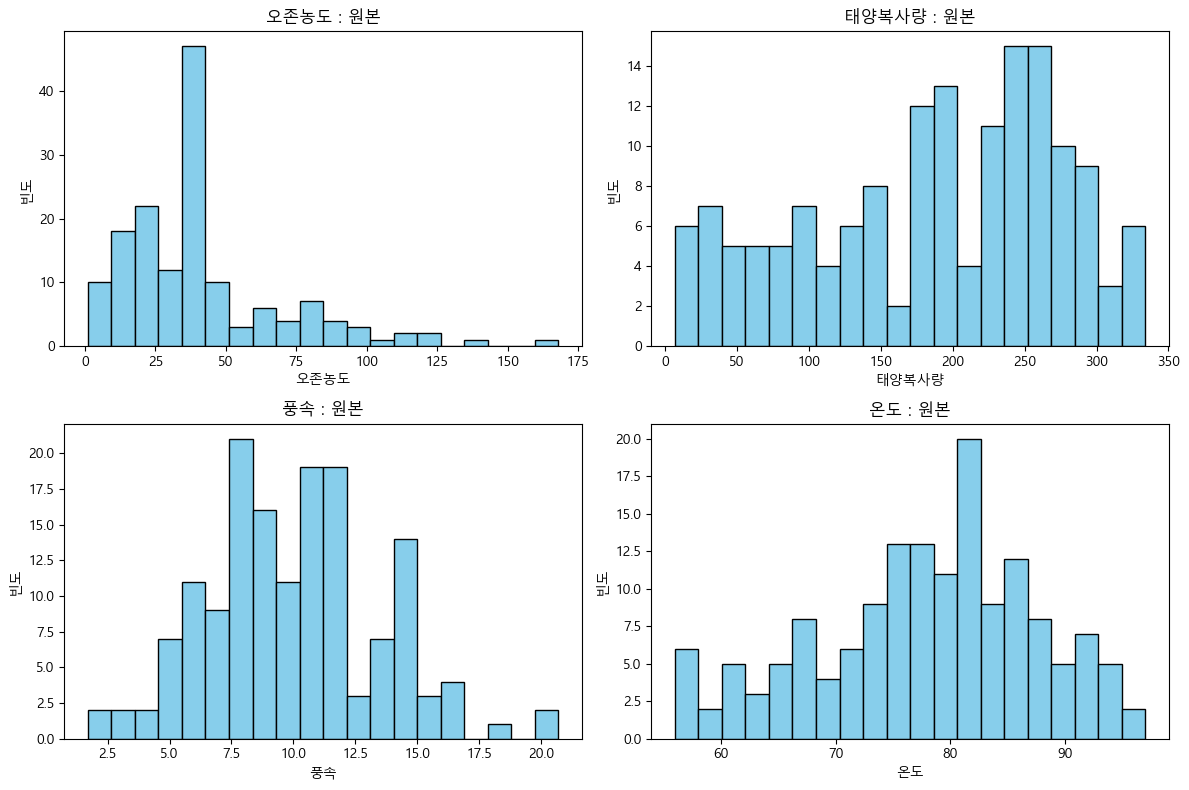

[[<Axes: title={'center': '오존농도 : 원본'}, xlabel='오존농도', ylabel='빈도'>
  <Axes: title={'center': '태양복사량 : 원본'}, xlabel='태양복사량', ylabel='빈도'>]
 [<Axes: title={'center': '풍속 : 원본'}, xlabel='풍속', ylabel='빈도'>
  <Axes: title={'center': '온도 : 원본'}, xlabel='온도', ylabel='빈도'>]] Axes(0.546887,0.0703472;0.431424x0.393455)


In [149]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8)) # figsize = (넓이, 높이)
for i, feature in enumerate(features):  # enumerate : 인덱스 같이 생성
    # i는 features의 인덱스 숫자(0~3)
    # feature는 문자열 리스트 (오존농도 ~ 온도)
    ax = axs[i//2, i%2]
    # axs[i//2, i%2] ~ axs[3//2, 3%2]
    # axs[0,0] ~ axs[1,1]
    ax.hist(df[feature], bins = 20, color='skyblue', edgecolor='black')
    ax.set_title(f'{feature} : 원본')
    ax.set_xlabel(feature)
    ax.set_ylabel('빈도')
plt.tight_layout() # 글자 겹치는거 깔끔하게 정리
plt.show()
print(axs, ax)

In [76]:
# pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 57.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   --------- ------------------------------ 11.5/46.2 MB 72.3 MB/s eta 0:00:01
   ---------------------------- ----------- 32.5/46.2 MB 79.4 MB/s eta 0:00:01
   ---------------------------------------  46.1/46.2 MB 79.4 MB/s eta 0:00:01
   ---------------------------------------- 46.2/46.2 MB 68.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
import_scaler = MinMaxScaler()

In [82]:
df_normalized = df.copy()
df_normalized.head(3)

,오존농도,태양복사량,풍속,온도,월,일
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3


In [84]:
features

['오존농도', '태양복사량', '풍속', '온도']

In [87]:
# df_normalized[features]
df_normalized[features] = import_scaler.fit_transform(df[features]) # 데이터가 0 ~ 1 사이의 값으로 변경
df_normalized.head()

,오존농도,태양복사량,풍속,온도,월,일
1,0.239521,0.559633,0.300000,0.268293,5,1
2,0.209581,0.339450,0.331579,0.390244,5,2
3,0.065868,0.434251,0.573684,0.439024,5,3
4,0.101796,0.935780,0.515789,0.146341,5,4
5,0.246283,0.547191,0.663158,0.000000,5,5


In [89]:
df[features].head()


,오존농도,태양복사량,풍속,온도
1,41.00000,190.000000,7.4,67
2,36.00000,118.000000,8.0,72
3,12.00000,149.000000,12.6,74
4,18.00000,313.000000,11.5,62
5,42.12931,185.931507,14.3,56


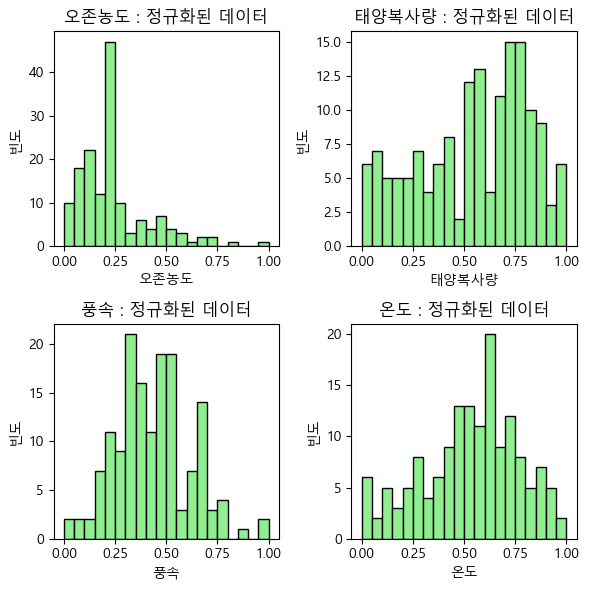

In [92]:
fig, axs = plt.subplots(2, 2, figsize = (6,6)) # figsize = (넓이, 높이)
for i, feature in enumerate(features):
    # i는 features의 인덱스 숫자(0~3)
    # feature는 문자열 리스트 (오존농도 ~ 온도)
    ax = axs[i//2, i%2]
    # axs[i//2, i%2] ~ axs[3//2, 3%2]
    # axs[0,0] ~ axs[1,1]
    ax.hist(df_normalized[feature], bins = 20, color='lightgreen', edgecolor='black')
    ax.set_title(f'{feature} : 정규화된 데이터')
    ax.set_xlabel(feature)
    ax.set_ylabel('빈도')
plt.tight_layout() # 글자 겹치는거 깔끔하게 정리
plt.show()
    
# 0 ~ 1 까지의 값으로 정규화 해서 바꿔지만 그래프의 모양은 달라지지 않는다!!!

## 4. 표준화 (Standardization)
- 데이터를 평균 0, 표준편차 1로 조정하는 방법 (정규분포화)
### 4-1. Standard Scaling
- 데이터가 고르게 분포되지 않았을 때 표준화

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[features] = scaler_std.fit_transform(df[features])

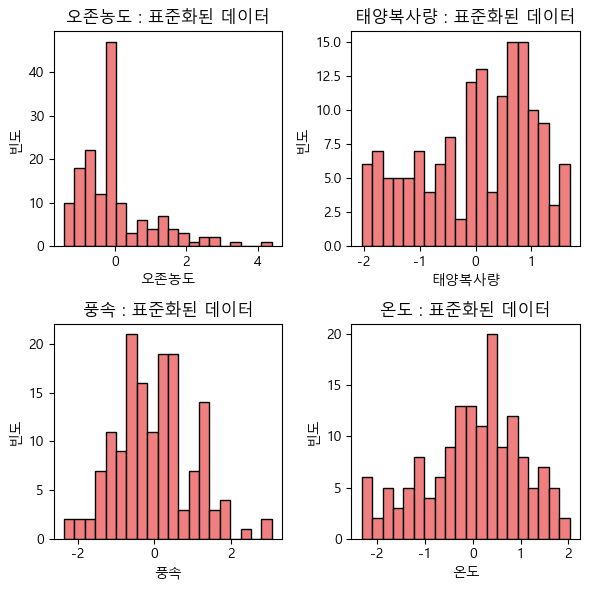

In [96]:
fig, axs = plt.subplots(2, 2, figsize = (6,6)) # figsize = (넓이, 높이)
for i, feature in enumerate(features):
    # i는 features의 인덱스 숫자(0~3)
    # feature는 문자열 리스트 (오존농도 ~ 온도)
    ax = axs[i//2, i%2]
    # axs[i//2, i%2] ~ axs[3//2, 3%2]
    # axs[0,0] ~ axs[1,1]
    ax.hist(df_standardized[feature], bins = 20, color='lightcoral', edgecolor='black')
    ax.set_title(f'{feature} : 표준화된 데이터')
    ax.set_xlabel(feature)
    ax.set_ylabel('빈도')
plt.tight_layout() # 글자 겹치는거 깔끔하게 정리
plt.show()
    
# 평균이 0, 표준편차는 1로 표준화 해서 바꿔지만 그래프의 모양은 달라지지 않는다!!!

## 5. 데이터 인코딩 (Encoding)
- 범주형 데이터를 수치형 데이터로 변환하여 머신러닝 알고리즘에 사용할 수 있도록 함

In [138]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [99]:
person_data ={
    '이름' :['김철수','이영희','박민수','최지혜','정현우'],
    '성별' : ['남','여','남','여','남']
}
person_df = pd.DataFrame(person_data)
person_df

,이름,성별
0,김철수,남
1,이영희,여
2,박민수,남
3,최지혜,여
4,정현우,남


In [ ]:
encoder = LabelEncoder() # 알아서 맵핑을 하기 때문에, 인코딩의 변환값을 지정할 수 없다
person_df['성별 _인코딩'] = encoder.fit_transform(person_df['성별'])
person_df

,이름,성별,성별_라벨링,성별 _인코딩
0,김철수,남,1,0
1,이영희,여,0,1
2,박민수,남,1,0
3,최지혜,여,0,1
4,정현우,남,1,0


### 5-1. Label Encoding
- 수동 인코딩, 성별을 1(남), 0(여)로 변환

In [102]:
person_data ={
    '이름' :['김철수','이영희','박민수','최지혜','정현우'],
    '성별' : ['남','여','남','여','남']
}
person_df = pd.DataFrame(person_data)
person_df

,이름,성별
0,김철수,남
1,이영희,여
2,박민수,남
3,최지혜,여
4,정현우,남


In [103]:
person_df['성별_라벨링'] = person_df['성별'].apply(lambda x : 1 if x == '남' else 0) # 람다는 어플라이랑 세트이다
person_df

,이름,성별,성별_라벨링
0,김철수,남,1
1,이영희,여,0
2,박민수,남,1
3,최지혜,여,0
4,정현우,남,1


In [104]:
a=pd.Series([1,2,3,4])

In [106]:
a_map = a.map(lambda x : x*2)
a_map

0    2
1    4
2    6
3    8
dtype: int64

### 5-2. One-Hot Encoding
- 성별을 남/여로 나누어 각각의 열로 변환
- One-Hot Encoding은 범주형 데이터를 이진 변수로 변환하여, 각 범주를 독립적인 열로 만듦

In [ ]:
person_data ={
    '이름' :['김철수','이영희','박민수','최지혜','정현우'],
    '성별' : ['남','여','남','여','남']
}
person_df = pd.DataFrame(person_data)
person_df

In [107]:
df_onehot = pd.get_dummies(person_df, columns=['성별']) # True, Flase 로 출력해 줌 (너무 많은 자료들을 인코딩할때는 적합하지 않을 수 있다)
df_onehot

,이름,성별_라벨링,성별_남,성별_여
0,김철수,1,True,False
1,이영희,0,False,True
2,박민수,1,True,False
3,최지혜,0,False,True
4,정현우,1,True,False


## 6. 통계적 검정
- 데이터를 바탕으로 하여 특정 가설이 `참`인지 `거짓`인지를 판단하는 과정
- 일반적으로 두 집단 간의 차이를 비교하거나, 변수 간의 관계를 분석할 때 사용  

|용어|설명|
|--|--|
|모집단|전체 데이터를 의미하며, 분석 대상이 되는 큰 그룹.|
|표본|모집단에서 선택한 일부 데이터를 의미함.|
|귀무가설(H0)|차이가 없거나 관계가 없다고 가정하는 기본 가설.|
|대립가설(H1)|차이가 있거나 관계가 있다는 가정.|
|유의수준(α)|보통 0.05로 설정하며, 결과가 우연일 가능성을 의미함.|
|p-value|귀무가설이 맞다는 전제하에 데이터가 관측될 확률.|


## 7. T-TEST
- 두 그룹 간의 평균 차이를 비교하는 통계 방법
- p-value가 0.05보다 작으면 두 그룹 간의 차이가 유의미하다고 판단

In [108]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

In [109]:
np.random.normal(80, 10, 10).tolist() # 평균, 표준편차, 데이터갯수

[66.17702280643056,
 61.00059446818497,
 73.8852423944694,
 83.41801882055643,
 77.80063775963977,
 90.04098086767405,
 72.1343157315989,
 82.50010083237227,
 74.68756118084258,
 80.99350051475417]

In [111]:
data_ttest = pd.DataFrame({
    '성별' : ['남'] *10 + ['여'] * 10,
    '점수' : np.random.normal(75, 10, 10).tolist() + np.random.normal(80, 10, 10).tolist()
})
data_ttest.head()

,성별,점수
0,남,76.076447
1,남,78.311272
2,남,57.211448
3,남,81.156143
4,남,57.372790


In [113]:
man = data_ttest[data_ttest['성별'] == '남']['점수']
man

0    76.076447
1    78.311272
2    57.211448
3    81.156143
4    57.372790
5    82.369677
6    80.328666
7    84.824334
8    71.677342
9    82.014294
Name: 점수, dtype: float64

In [114]:
woman = data_ttest[data_ttest['성별'] == '여']['점수']
woman

10     67.353055
11     92.106212
12     79.207433
13     84.774463
14     81.526279
15     75.742775
16    103.249683
17     82.493760
18     74.944157
19     97.619003
Name: 점수, dtype: float64

In [115]:
t_stat, p_vel = ttest_ind(man, woman)

In [116]:
print(f'p-value : {p_vel}')
# 유의수즌 0.05 라는 값을 주로 설정합니다.
# 우리가 관측한 p-value의 값이 0.05보다 작은 경우, 두 그룹의 평균에 유의미한 차이가 있다고 판단
# 귀무가설 : 두 집단 사이에 유의미한 차이가 없다
# 두 집단에 유의미한 차이가 있다 : 귀무가설을 기각하는 경우

p-value : 0.0791471533051642


In [125]:
# ANOVA : 세 그룹 간 평균을 비교
data_anova = pd.DataFrame({
    '그룹' : ['A']* 10 + ['B']* 10 + ['C'] * 10,
    '점수' : np.random.normal(70, 10, 10).tolist() + np.random.normal(75, 10, 10).tolist() + np.random.normal(80, 10, 10).tolist()
})
data_anova.head()

,그룹,점수
0,A,73.213095
1,A,86.813953
2,A,91.218982
3,A,83.166485
4,A,88.080827


In [126]:
group_a = data_anova[data_anova['그룹'] == 'A']['점수']
group_b = data_anova[data_anova['그룹'] == 'B']['점수']
group_c = data_anova[data_anova['그룹'] == 'C']['점수']

In [127]:
f_stat, p_val = f_oneway(group_a, group_b, group_c) # f_stat가 크면 집단간의 차이가 크다, 작으면 집단간 차이가 작다
print(f'p-velue : {p_val}')
# 유의수준인 0.05보다 큰 p-value, 세 그룹 사이에 유의미한 차이가 없다 라고 볼 수 있음

p-velue : 0.2890874302851057


In [128]:
# 카이제곱검정, 범주형 변수간의 독립성을 검정
# 고객이 만족도 조사를 했는데, 그 조사를 한 지역이 서울과 부산으로 두 가지 입니다.
data_chi2 = pd.DataFrame({
    '지역' : ['서울']*50 + ['부산']*50,
    '만족도' : ['만족']*30 + ['불만족']*20 +['만족']*25 +['만족']*25
})
data_chi2.head()

,지역,만족도
0,서울,만족
1,서울,만족
2,서울,만족
3,서울,만족
4,서울,만족


In [131]:
cross_table = pd.crosstab(data_chi2['지역'], data_chi2['만족도'])
cross_table

만족도,만족,불만족
지역,,
부산,50,0
서울,30,20


In [ ]:
chi2, p_val_chi2, _, __ = chi2_contingency(cross_table) # 언더바는 안볼거니까 사용

In [143]:
print(f'chi2-statisctic : {chi2}, p-value : {p_val_chi2}')
# p-value가 유의수준인 0.05보다 크기 때문에 두 변수 간의 관계가 통계적으로 유의미하지 않다
# 결론 : 두 변수는 독립적이다

chi2-statisctic : 22.5625, p-value : 2.034166485137406e-06


In [133]:
iris = data('iris')
iris.head()
# 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 꽃 종류

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [144]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)


## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 가상의 헬스앱에서 친구들이 공유한 운동 기록 데이터를 분석합니다. 일부 운동기록에서 누락된 중요한 정보가 있습니다. 이 때 데이터를 정리하기 위해 결측치를 찾아서 처리해보세요
* fitness.csv

Q2. 걸음 수와 소모 칼로리 컬럼의 값을 Min-Max Scaling하여 정규화하세요

Q3. 걸음 수나 소모 칼로리가 너무 높은 값을 기록한 데이터를 확인해보세요. 박스플롯을 그려보고 이상치를 탐색하여 처리해보세요

Q4. 데이터를 분석하기 전에 운동 시간과 소모 칼로리를 표준화해보세요

Q5. 결측치와 이상치를 처리하고, 걸음 수와 소모 칼로리에 대해 정규화 및 표준화를 수행한 후. 성별을 인코딩하여 범주형 데이터를 처리해보세요